# Sample Exploratory Data Analysis

Dataset: Information scraped from Wikipedia about over 1000 rollercoasters.

Business Understanding/Goal: Get some information about rollercoasters!

## 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)

/var/folders/z9/gzbgl18s2wgcr125qq0q2h280000gn/T/ipykernel_97275/3711532654.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Load the Dataset

In [7]:
df = pd.read_csv("data/coaster.csv")

## 3. Understand the Data

In [8]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1086 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          936 non-null    object 
 3   Location                       1086 non-null   object 
 4   Status                         873 non-null    object 
 5   Opening date                   836 non-null    object 
 6   Type                           1086 non-null   object 
 7   Manufacturer                   1027 non-null   object 
 8   Height restriction             830 non-null    object 
 9   Model                          743 non-null    object 
 10  Height                         964 non-null    object 
 11  Inversions                     931 non-null    float64
 12  Lift/launch system             794 non-null    o

Columns that look usefull:
* coaster_name, length, speed, location, opening date, status, type, manufacturer, height, inversions, year_introduced, Type_Main(repeated), speeds(repeated), height(repeated), Inversions_clean(repeated)

From this info, I could learn:
* Where most rollercoasters are
* What types of rollercoasters there are and where
* How the speed relates to the height
* How many time they go upside down


In [9]:
# Other useful functions for understanding the data
df.head(10)
# df.describe()
# df.columns

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,40 ft (12 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,41 ft (12 m),NaN,NaN,NaN,NaN,NaN,1:00,NaN,NaN,Edward Joy Morris,25°,9 ft (2.7 m),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,Wood,1902-01-01,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1904,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,60 ft (18 m),NaN,NaN,NaN,NaN,NaN,1 minute 30 seconds,NaN,NaN,"Christopher Feucht, Welcome Mosley",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907,41.58

## 4. Data Processing/Preparation

### 4.1. Dropping Unnecessary Columns

In [10]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [11]:
df = df[['coaster_name', 'Location', 'Status', 'Manufacturer', 
        'year_introduced', 'Type_Main','speed_mph', 'height_value', 'Inversions_clean', 'opening_date_clean']]

df.shape

(1086, 10)

In [12]:
# Rename our columns for consistency
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'Type_Main': 'Type',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_value':'Height_ft',
                   'Inversions_clean':'Inversions'})

### 4.2. Checking for Duplicates

In [13]:
df.duplicated().sum()

# Check for duplicated coaster names
df.duplicated(["Coaster_Name"]).sum()

# Get the rows and sort by coaster name
df.loc[df.duplicated(["Coaster_Name"], keep=False)].sort_values(["Coaster_Name"])

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Type,Speed_mph,Height_ft,Inversions,Opening_Date
467,Afterburn (roller coaster),Carowinds,Operating,Bolliger & Mabillard,1999,Steel,62.0,113.0,6,1999-03-20
780,Afterburn (roller coaster),Carowinds,Operating,Bolliger & Mabillard,2009,Steel,62.0,113.0,6,1999-03-20
270,Alpine Bobsled,Other,NaN,Intamin,1989,Steel,35.0,64.0,0,NaN
435,Alpine Bobsled,Other,NaN,Intamin,1998,Steel,35.0,64.0,0,NaN
206,Alpine Bobsled,Other,NaN,Intamin,1984,Steel,35.0,64.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
232,Wild Mouse (Idlewild),Idlewild and Soak Zone,Operating,Vekoma,1985,Steel,30.0,56.0,0,1985-01-01
749,Wipeout (roller coaster),Pleasurewood Hills,Operating,Vekoma,2007,Steel,50.0,120.0,6,2007-01-01
268,Wipeout (roller coaster),Pleasurewood Hills,Operating,Vekoma,1988,Steel,50.0,120.0,6,2007-01-01
858,Zippin Pippin,Other,NaN,The Gravity Group,2011,Wood,40.0,70.0,0,NaN


There are duplicated rows with differnet opening dates. The rollercoasters were opened, closed, then opened again. We'll keep the first opening date.

In [14]:
# Order data by year introducted
df = df.sort_values(["Year_Introduced"]).reset_index(drop=True)

# Keep just the first year
df = df.drop_duplicates(["Coaster_Name", "Location"], keep="first").reset_index(drop=True)

df.shape

(989, 10)

### 4.3. Checking for Null Values

In [15]:
df.isna().sum() / df.shape[0] 

Coaster_Name       0.000000
Location           0.000000
Status             0.147624
Manufacturer       0.058645
Year_Introduced    0.000000
Type               0.000000
Speed_mph          0.141557
Height_ft          0.111223
Inversions         0.000000
Opening_Date       0.185035
dtype: float64

### 4.4. String formatting and Categorization

In [16]:
# Status 
df["Status"].value_counts()

Status
Operating                                                         645
Removed                                                           133
Closed                                                             23
Under construction                                                 14
In Production                                                      11
Discontinued                                                        7
Chapter 7 bankruptcy; rides dismantled and sold; property sold      2
Not Currently Operating                                             1
closed for maintenance as of july 30 no reopening date known        1
Closed in 2021                                                      1
SBNO December 2019                                                  1
Temporarily Closed                                                  1
SBNO (Standing But Not Operating)                                   1
Temporarily closed                                                  1
Under Mainten

We will condense our categories into the following 5: In Production, Operating, Non-operational, Closed, Removed.

In [17]:
# Possible statuses: In Production, Operating, Non-operational, Closed, Removed
status_dt = {"Non-operational": ["Temporarily closed", "Temporarily Closed", "Under Maintenance", "Not Currently Operating", "Under construction"],
             "Closed": ["Closed in 2021", "closed for maintenance as of july 30 no reopening date known", "SBNO (Standing But Not Operating)", "SBNO December 2019"],
             "Removed": ["Chapter 7 bankruptcy; rides dismantled and sold; property sold", "Discontinued"]}

def organize_status(word):
    for key in status_dt:
        if word in status_dt[key]:
            return key
    return word

df["Status"] = df["Status"].map(organize_status)
df["Status"].value_counts()

Status
Operating          645
Removed            142
Closed              27
Non-operational     18
In Production       11
Name: count, dtype: int64

In [18]:
# Type
df["Type"].value_counts()

Type
Steel    727
Wood     191
Other     71
Name: count, dtype: int64

### 4.4. Other Possible Steps
* Creating new columns
* Removing rows with missing values
* Imputation if necessary
* String formatting

## 5. Univariate Analysis
AKA Feature Analysis

(Descriptive Statistics for individual columns)

[Seaborn Documentation](https://seaborn.pydata.org/tutorial/introduction.html)

[Seaborn Style Documentation](https://python-charts.com/seaborn/themes/)

In [19]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Type', 'Speed_mph', 'Height_ft', 'Inversions', 'Opening_Date'],
      dtype='object')

### 5.1. Numerical Data

<Axes: xlabel='Height_ft'>

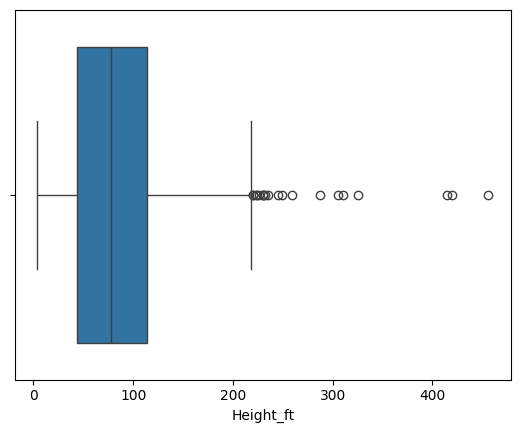

In [20]:
# Height
sns.boxplot(data=df, x="Height_ft")

# df.loc["Height_ft"] == df["Height_ft"].max()

<Axes: xlabel='Year_Introduced', ylabel='Count'>

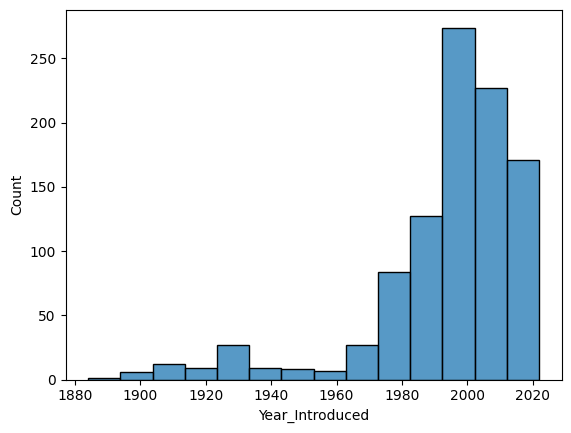

In [21]:
# Year introduced
sns.histplot(data =df, x="Year_Introduced", binwidth=10)

### 5.2. Categorical Data

<Axes: xlabel='Status', ylabel='Count'>

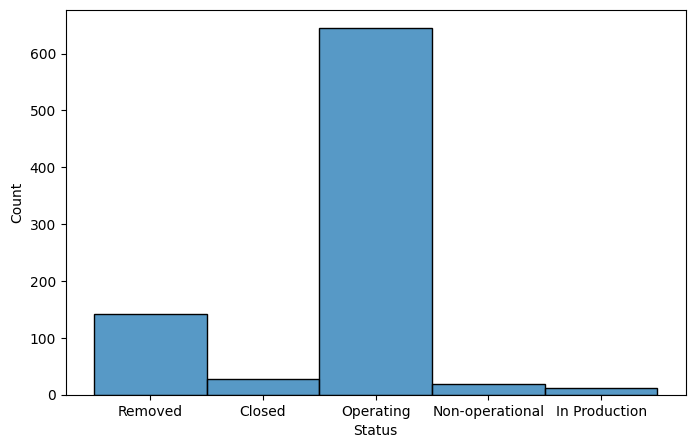

In [22]:
# Status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Status")

### 5.3. Multiple Plots

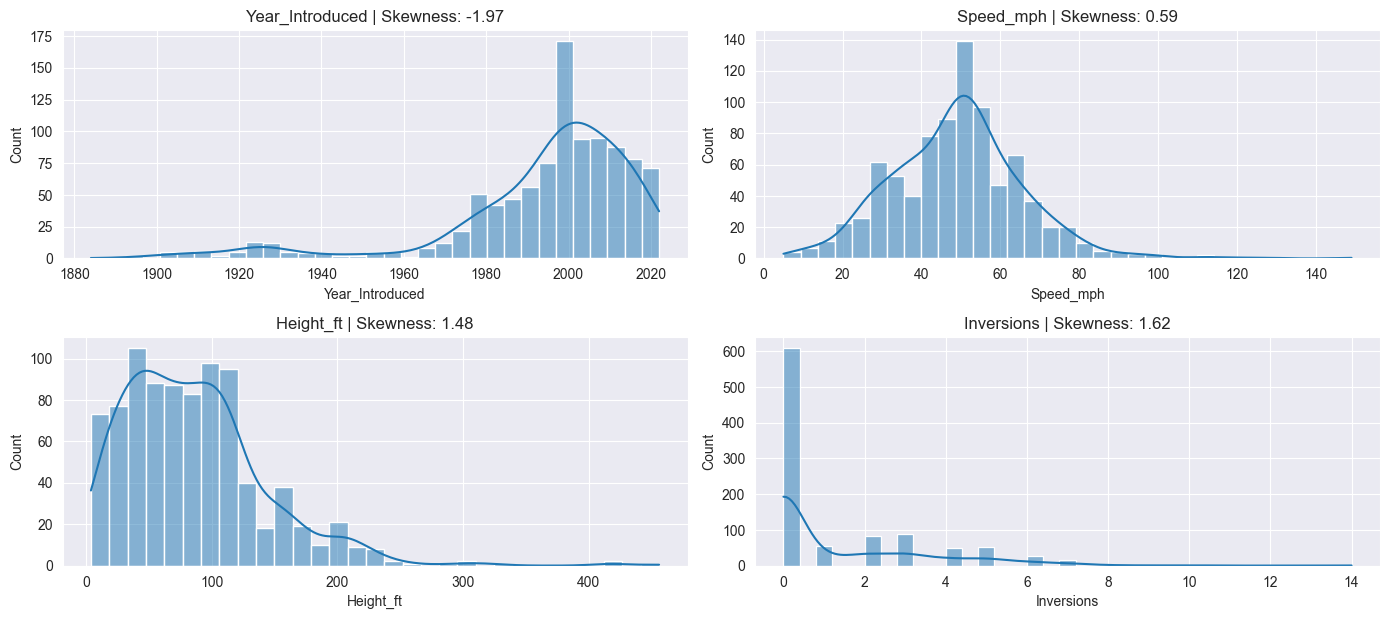

In [23]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


## 6. Multivariate Analysis

### 6.1. Scatter Plots

#### 6.1.1. Two Numerical Values

Text(0.5, 1.0, 'Height vs Speed')

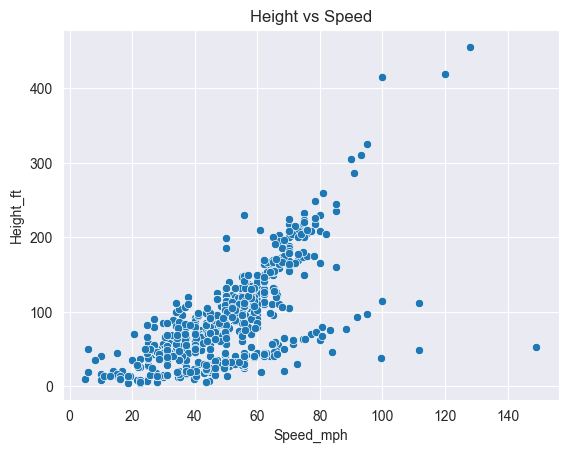

In [24]:
sns.scatterplot(data=df, x="Speed_mph", y="Height_ft")
plt.title("Height vs Speed")

#### 6.1.2. Three Numerical Values

Text(0.5, 1.0, 'Height vs Speed')

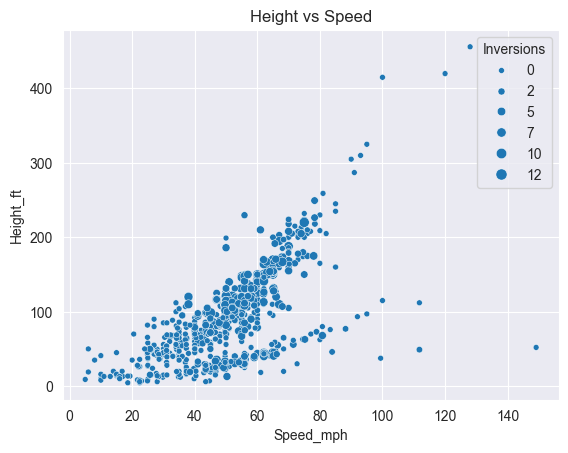

In [25]:
sns.scatterplot(data=df, x="Speed_mph", y="Height_ft", size="Inversions")
plt.title("Height vs Speed")

#### 6.1.3. Categorical Values

Text(0.5, 1.0, 'Height vs Speed')

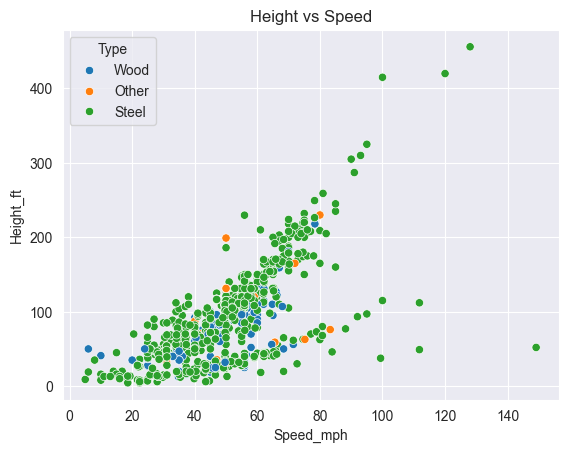

In [26]:
sns.scatterplot(data=df, x="Speed_mph", y="Height_ft", hue="Type")
plt.title("Height vs Speed")

## 7. Statistical Analysis

We now have enough of an understanding of our data to formulate some questions. For example, we could try to figure out:
* The average speeds of different types of rollercoasters
* Which manufacturer has been most successful in maintaining open coasters
* Where the fastest coasters are located
* The status of different types of coasters